In [86]:
import torch

import numpy as np
import pandas as pd

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [87]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
training = TriplesFactory.from_path(
    'data//pykeen//train.txt',
    entity_to_id = {str(i): i for i in range(20619)})
testing = TriplesFactory.from_path(
   'data//pykeen//test.txt',
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id)

In [88]:
from pykeen.nn.representation import LabelBasedTransformerRepresentation
import pykeen.nn
from pykeen.pipeline import pipeline
from pykeen.sampling import BasicNegativeSampler

result = pipeline(
    training = training,
    testing = testing,
    model='TransE',
    training_loop='sLCWA',
    model_kwargs = dict(embedding_dim = 128),
    optimizer = "Adam",
    optimizer_kwargs = dict(lr = 0.0001),
    loss = "pairwiselogistic",
    negative_sampler="basic",
    negative_sampler_kwargs=dict(num_negs_per_pos=100),
    training_kwargs = dict(num_epochs=100, batch_size=1024)
)
model = result.model
result.save_to_directory('log//pykeen_transe')

INFO:pykeen.pipeline.api:Using device: None
/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/pykeen/nn/representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/396 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/205k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 27.43s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=20619, num_relations=2, num_triples=404992, inverse_triples=False, path="/data/home/eegorova/data/kge_model/data/pykeen/train.txt") to file:///data/home/eegorova/data/kge_model/log/pykeen_transe/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///data/home/eegorova/data/kge_model/log/pykeen_transe


In [89]:
print(f"MRR: {result.metric_results.to_flat_dict()['both.realistic.inverse_harmonic_mean_rank']}")
for k in [1,3,5,10]:
    print(f"Hits@{k} : {result.metric_results.to_flat_dict()['both.realistic.hits_at_'+str(k)]}")

MRR: 0.11238296505064681
Hits@1 : 0.06765682206492556
Hits@3 : 0.11709787649499634
Hits@5 : 0.14686599951183793
Hits@10 : 0.19692701977056382


In [90]:
entity_embedding_tensor = model.entity_representations[0](indices=None).detach().cpu().numpy()

In [91]:
NAME_PATH_CLUST = 'clustering//pykeen//'
# os.mkdir(NAME_PATH_CLUST)
NUM_CLUSTERS = 10

data = pd.read_csv ('data//df_2.csv')
cust_embed = entity_embedding_tensor[:max(data['head'])+1]

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, init="k-means++")
kmeans_model.fit(cust_embed)

KMeans(n_clusters=10)

In [92]:
tsne = TSNE(n_components=2, perplexity=150.0)
X_embedded = tsne.fit_transform(cust_embed)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


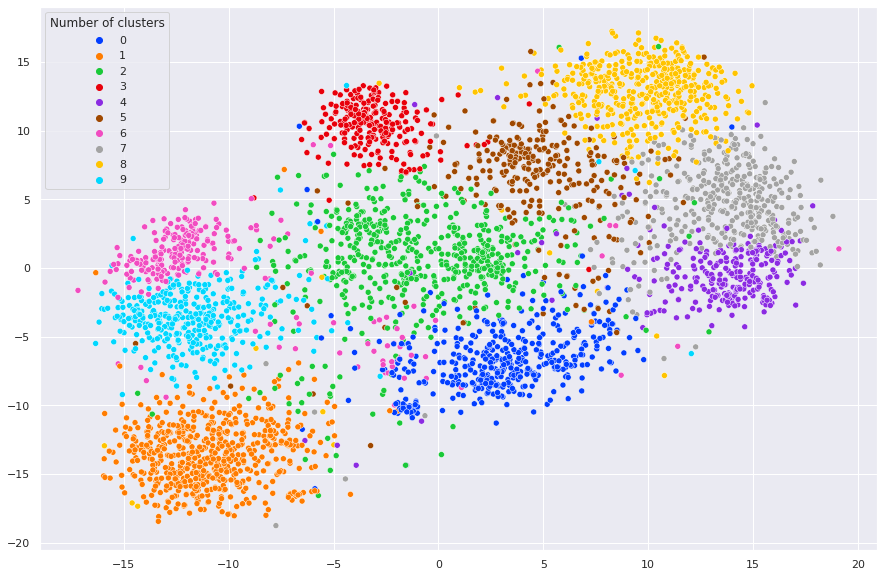

In [93]:
sns.set(rc={'figure.figsize':(15,10)})
palette = sns.color_palette("bright", NUM_CLUSTERS)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=kmeans_model.labels_, legend='full', palette=palette)
plt.legend(title="Number of clusters")
plt.savefig(NAME_PATH_CLUST+'clusters.png', dpi=300)

In [94]:
import collections
data = pd.read_csv('data//df_2.csv')

data_new = pd.DataFrame()
data_new['head'] = list(range(max(data['head'])+1))
data_new['volume'] = [sum(data[data['head'] == i]['amount']) for i in range(max(data['head'])+1)]
data_new['volume_clust'] = pd.qcut(data_new.volume, q=10) #, labels= [str(i) for i in range(10)]
data_new['purchases'] = [len(data[data['head'] == i]) for i in range(max(data['head'])+1)]  
data_new['purchases_clust'] = pd.qcut(data_new.purchases, q=10) 
data_new['stability'] = [len(set(data[data['head'] == i]['tail'])) for i in range(max(data['head'])+1)] 
data_new['stability_clust'] = pd.qcut(data_new.stability, q=10) 
data_new['type'] = [sorted(collections.Counter(set(data[data['head'] == i]['category'])), key=collections.Counter(set(data[data['head'] == i]['category'])).get, reverse=True)[0] for i in range(max(data['head'])+1)] 
data_new['district'] = [sorted(collections.Counter(set(data[data['head'] == i]['district'])), key=collections.Counter(set(data[data['head'] == i]['district'])).get, reverse=True)[0] for i in range(max(data['head'])+1)] 

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


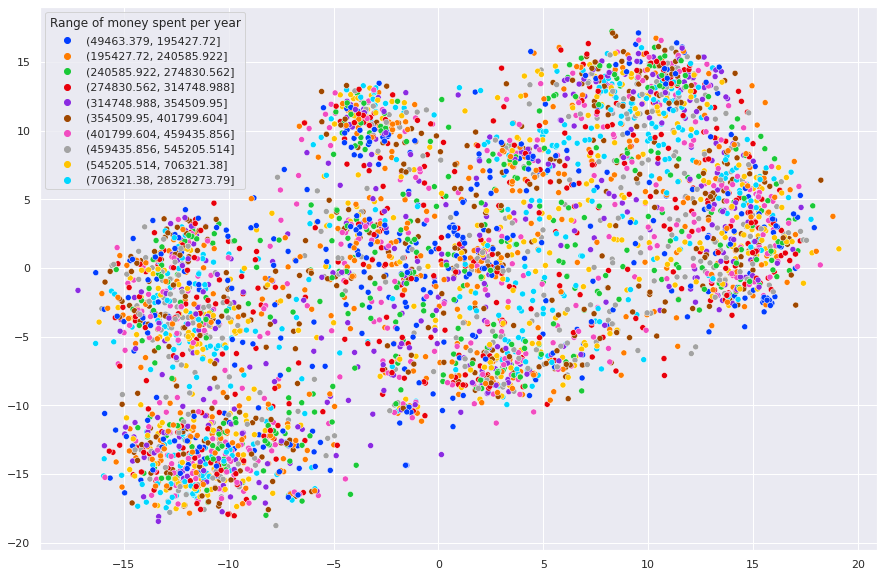

In [95]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new['volume_clust'], legend='full', palette=palette)
plt.legend(title="Range of money spent per year")
plt.savefig(NAME_PATH_CLUST+'money_spent.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


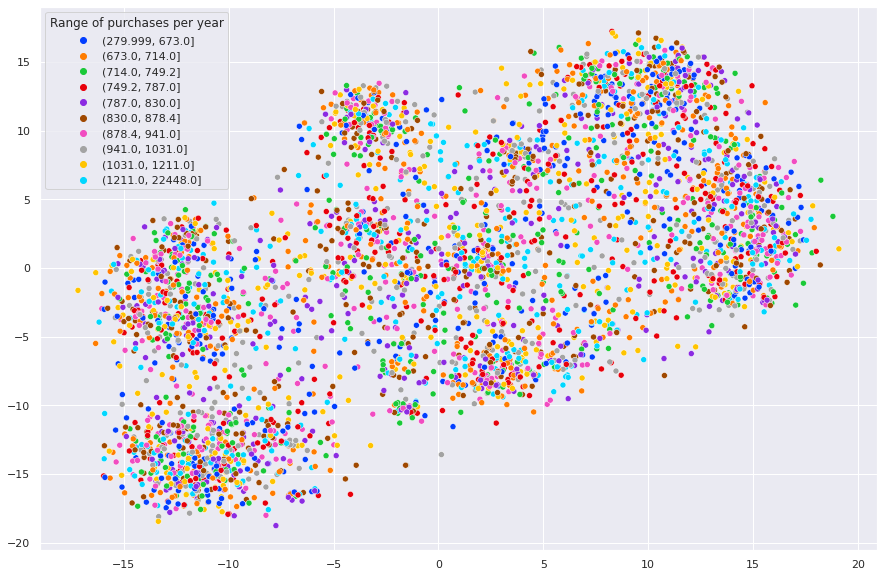

In [96]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new['purchases_clust'], legend='full', palette=palette)
plt.legend(title="Range of purchases per year")
plt.savefig(NAME_PATH_CLUST+'purchases.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


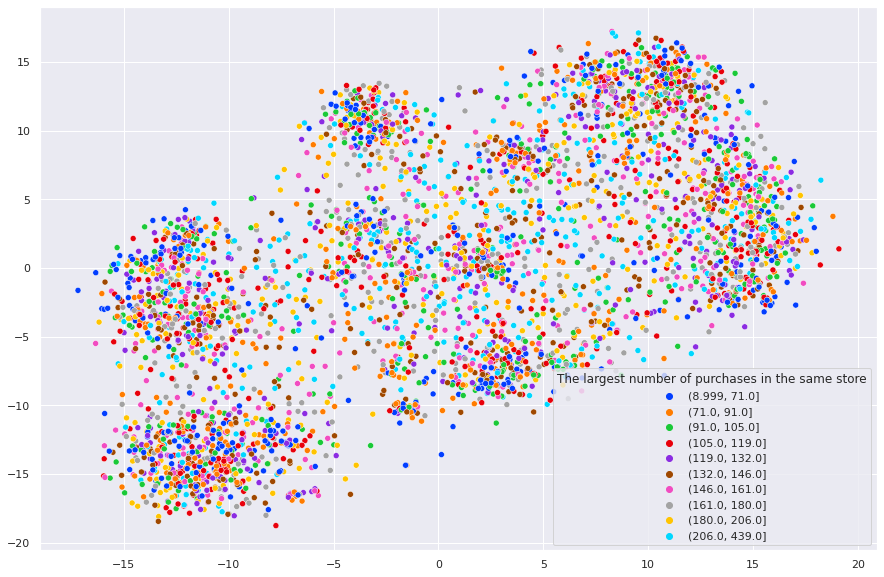

In [97]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new['stability_clust'], legend='full', palette=palette)
plt.legend(title="The largest number of purchases in the same store")
plt.savefig(NAME_PATH_CLUST+'stability.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


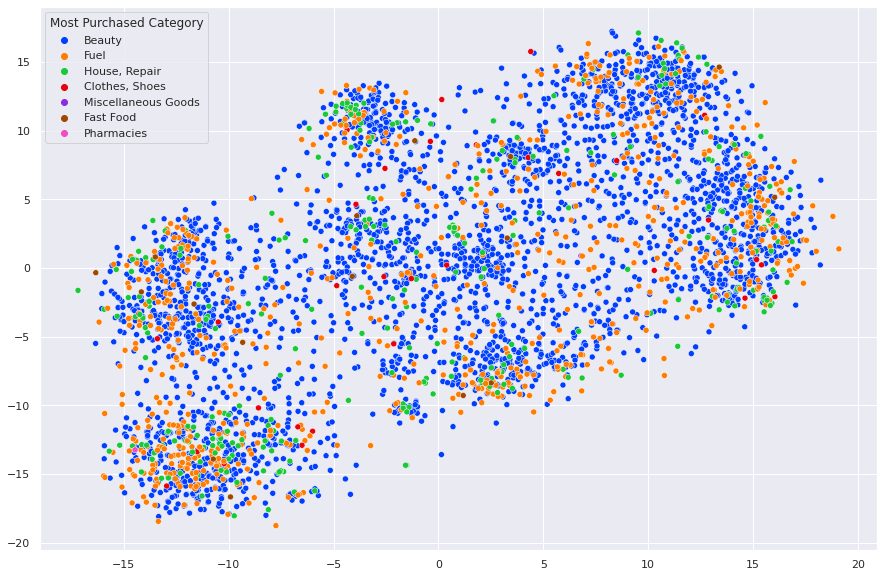

In [98]:
palette = sns.color_palette("bright", len(data_new['type'].unique()))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new['type'], legend='full', palette=palette)
plt.legend(title="Most Purchased Category")
plt.savefig(NAME_PATH_CLUST+'popular_category.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


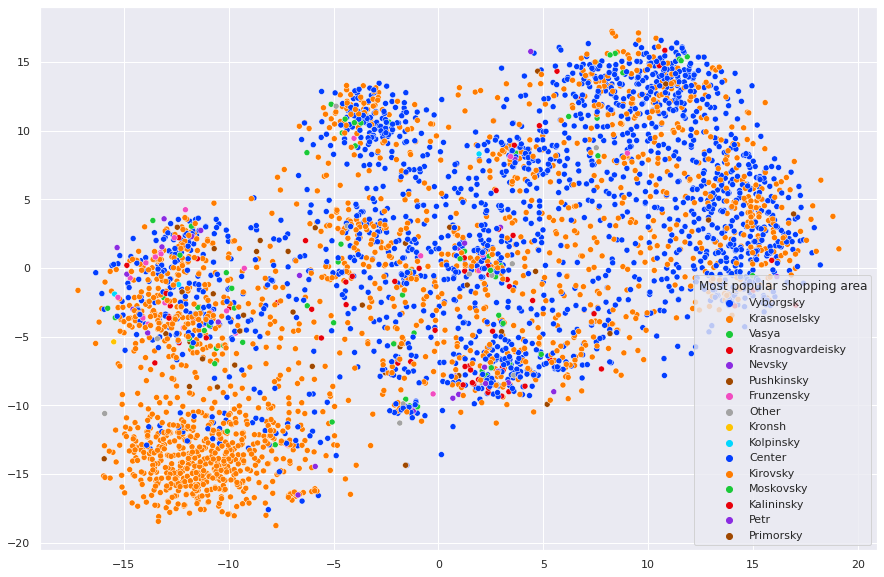

In [100]:
dict_district = {
    'Приморский район': 'Primorsky',
    'Кировский район': 'Kirovsky',
    'Красногвардейский район': 'Krasnogvardeisky',
    'Фрунзенский район': 'Frunzensky',
    'Красносельский район': 'Krasnoselsky',
    'Другое': 'Other',
    'Колпинский район': 'Kolpinsky',
    'Московский район': 'Moskovsky',
    'Адмиралтейский район': 'Admiralteisky',
    'Выборгский район': 'Vyborgsky',
    'Невский район': 'Nevsky',
    'Калининский район': 'Kalininsky',
    'Пушкинский район': 'Pushkinsky',
    'Центральный район': 'Center',
    'Петродворцовый район': 'Petr',
    'Василеостровский район': 'Vasya',
    'Кронштадтский район': 'Kronsh'
}

data_new['district'] = [dict_district[i] for i in data_new['district']]

palette = sns.color_palette("bright", data_new['district'].nunique())
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new['district'], legend='full', palette=palette)
plt.legend(title="Most popular shopping area")
plt.savefig(NAME_PATH_CLUST+'district.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


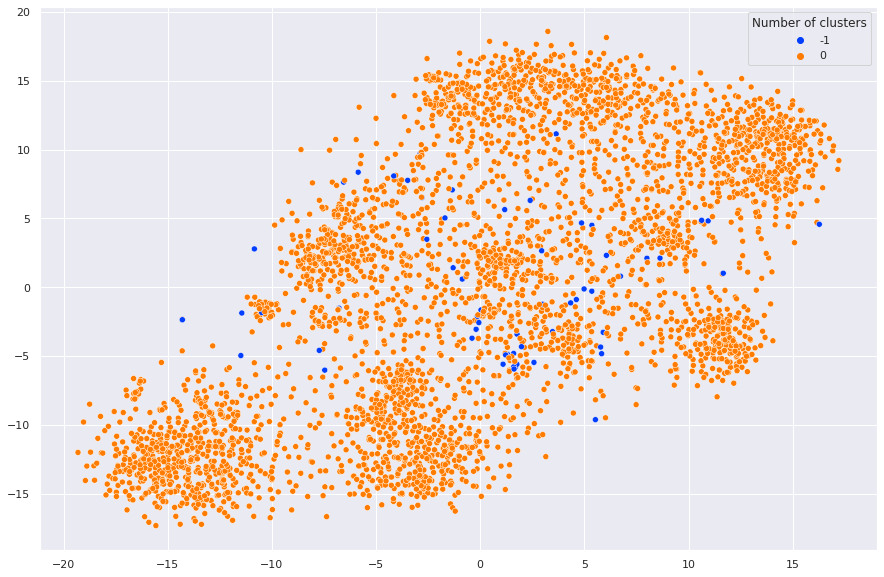

In [121]:
from sklearn.cluster import KMeans, DBSCAN
# kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, init="k-means++")
dbscan_model = DBSCAN(eps=1.1, min_samples=100)
dbscan_model.fit(np.array(cust_embed))

tsne = TSNE(n_components=2, perplexity=150.0)
X_embedded = tsne.fit_transform(cust_embed)
                 
palette = sns.color_palette("bright", len(set(dbscan_model.labels_)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=dbscan_model.labels_, legend='full', palette=palette)
plt.legend(title="Number of clusters")
plt.savefig(NAME_PATH_CLUST+'clusters_DBSCAN.png', dpi=300)

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


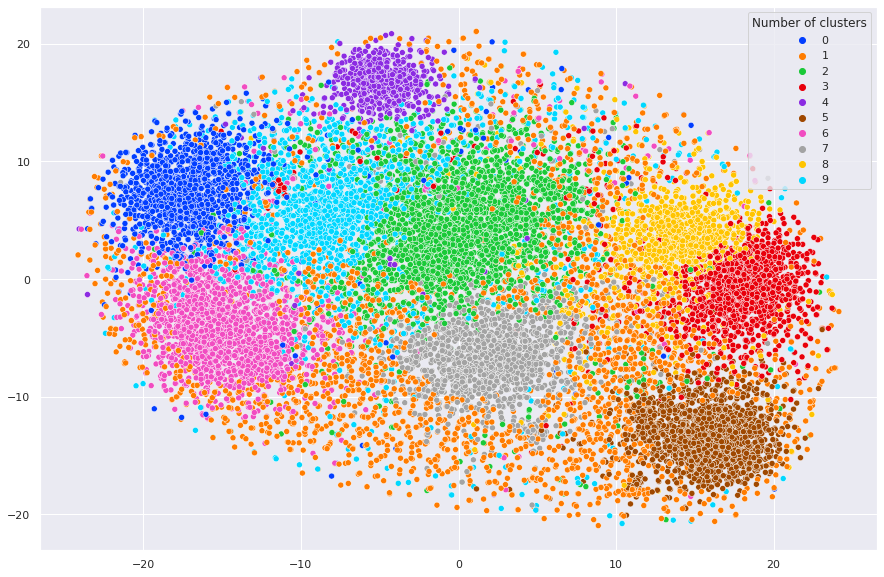

In [123]:
NUM_CLUSTERS = 10

shop_embed = entity_embedding_tensor[max(data['head']+1):-11]

tsne = TSNE(n_components=2, perplexity=150.0)
X_embedded = tsne.fit_transform(shop_embed)

kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, init="k-means++")
kmeans_model.fit(np.array(shop_embed))

plt.figure(figsize=(15,10))
palette = sns.color_palette("bright", len(set(kmeans_model.labels_)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=kmeans_model.labels_, legend='full', palette=palette)
plt.legend(title="Number of clusters")
plt.savefig(NAME_PATH_CLUST+'clusters_shops.png', dpi=300)

In [124]:
data_new_shop = pd.DataFrame()
data_new_shop['tail'] = list(range((max(data['head'])+1),max(data['tail'])))
data_new_shop['category'] = [list(data[data['tail'] == i]['category'])[0] for i in range(max(data['head'])+1,max(data['tail']))]

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


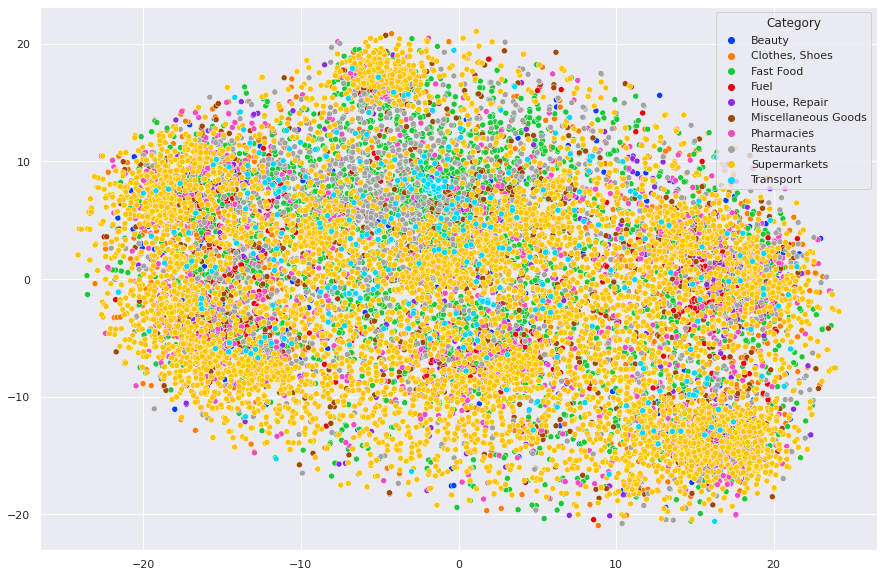

In [125]:
plt.figure(figsize=(15,10))
palette = sns.color_palette("bright", len(data_new_shop['category'].unique()))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data_new_shop['category'], legend='full', palette=palette)
plt.legend(title="Category")

/data/home/eegorova/.conda/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


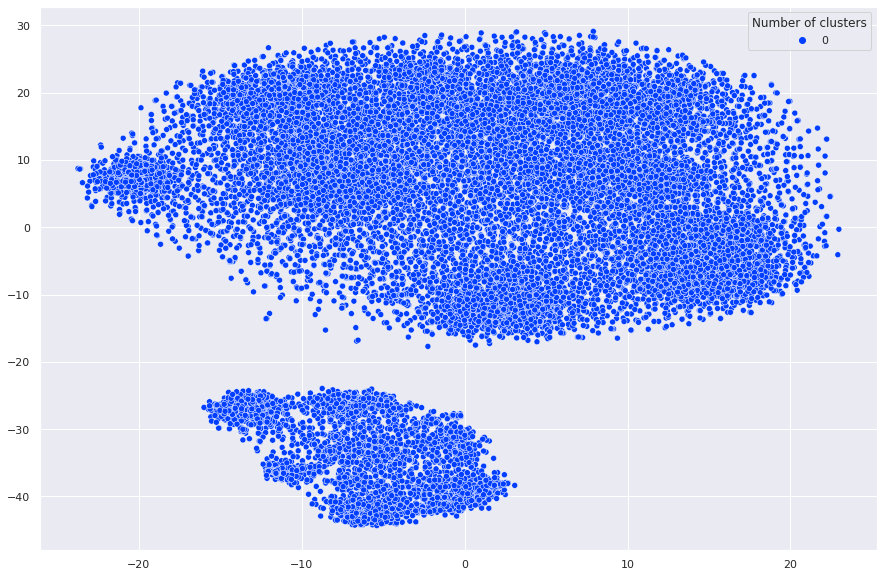

In [126]:
embed = entity_embedding_tensor

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, init="k-means++")
kmeans_model.fit(embed)

tsne = TSNE(n_components=2, perplexity=150.0)
X_embedded = tsne.fit_transform(embed)

sns.set(rc={'figure.figsize':(15,10)})
palette = sns.color_palette("bright", 1)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=[0]*len(X_embedded[:,0]), legend='full', palette=palette)
plt.legend(title="Number of clusters")
plt.savefig(NAME_PATH_CLUST+'clusters_shops_and_users.png', dpi=300)